## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Lunch_type, sleep_hrs,  and Screen_time, Study_preparation.


### 2) Data Collection
- Dataset Source Refrence - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 9 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/MOCK_DATA(2).csv')

#### Show Top 5 Records

In [3]:
df.head()

,Student_Name,Gender,Lunch_type,Sleep_type,screen_time,study_preparation,Cat_1,Cat_2,Previous_Cgpa
0,Suzie enzley,Female,acidic,full,excessive,not prepared,72,74,72
1,Brynne Lightbown,Female,basic,full,negligible,partially prepared,90,88,69
2,Aleda Alker,Female,acidic,full,negligible,fully prepared,95,93,90
3,Giles Danilchev,Male,acidic,half,negligible,partially prepared,57,44,47
4,Eziechiele Zum Felde,Male,acidic,full,excessive,partially prepared,78,75,76


#### Shape of the dataset

In [4]:
df.shape

(1000, 9)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- study_preparation : preparation of students -> (not prepared, partially prepared, fully prepared)
- Sleep_type : student sleep time  ->(full, half)
- lunch : having lunch before test (acidic, basic) 
- screen time of the student : (excessive, negligible, moderate)
- Cat-1 score
- Cat-2 score
- Previous_CGPA

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

Student_Name         0
Gender               0
Lunch_type           0
Sleep_type           0
screen_time          0
study_preparation    0
Cat_1                0
Cat_2                0
Previous_Cgpa        0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Student_Name       1000 non-null   object
 1   Gender             1000 non-null   object
 2   Lunch_type         1000 non-null   object
 3   Sleep_type         1000 non-null   object
 4   screen_time        1000 non-null   object
 5   study_preparation  1000 non-null   object
 6   Cat_1              1000 non-null   int64 
 7   Cat_2              1000 non-null   int64 
 8   Previous_Cgpa      1000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

Student_Name         1000
Gender                  2
Lunch_type              2
Sleep_type              2
screen_time             3
study_preparation       3
Cat_1                  72
Cat_2                  77
Previous_Cgpa          81
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,Cat_1,Cat_2,Previous_Cgpa
count,1000.000000,1000.000000,1000.00000
mean,69.169000,68.054000,66.08900
std,14.600192,15.195657,15.16308
min,17.000000,10.000000,0.00000
25%,59.000000,57.750000,57.00000
50%,70.000000,69.000000,66.00000
75%,79.000000,79.000000,77.00000
max,100.000000,100.000000,100.00000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for Previous_Cgpa, for Cat_1 minimum is much higher = 17 and for Cat_2 minimum is higher = 10

### 3.7 Exploring Data

In [10]:
df.head()

,Student_Name,Gender,Lunch_type,Sleep_type,screen_time,study_preparation,Cat_1,Cat_2,Previous_Cgpa
0,Suzie enzley,Female,acidic,full,excessive,not prepared,72,74,72
1,Brynne Lightbown,Female,basic,full,negligible,partially prepared,90,88,69
2,Aleda Alker,Female,acidic,full,negligible,fully prepared,95,93,90
3,Giles Danilchev,Male,acidic,half,negligible,partially prepared,57,44,47
4,Eziechiele Zum Felde,Male,acidic,full,excessive,partially prepared,78,75,76


In [11]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Sleep_type' variable:  ",end=" ")
print(df['Sleep_type'].unique())

print("Categories in'screen_time' variable:",end=" " )
print(df['screen_time'].unique())

print("Categories in 'Lunch_type' variable:     ",end=" " )
print(df['Lunch_type'].unique())

print("Categories in 'study_preparation' variable:     ",end=" " )
print(df['study_preparation'].unique())

Categories in 'gender' variable:      ['Female' 'Male']
Categories in 'Sleep_type' variable:   ['full' 'half']
Categories in'screen_time' variable: ['excessive' 'negligible' 'moderate']
Categories in 'Lunch_type' variable:      ['acidic' 'basic']
Categories in 'study_preparation' variable:      ['not prepared' 'partially prepared' 'fully prepared']


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Cat_1', 'Cat_2', 'Previous_Cgpa']

We have 6 categorical features : ['Student_Name', 'Gender', 'Lunch_type', 'Sleep_type', 'screen_time', 'study_preparation']


In [13]:
df.head(2)

,Student_Name,Gender,Lunch_type,Sleep_type,screen_time,study_preparation,Cat_1,Cat_2,Previous_Cgpa
0,Suzie enzley,Female,acidic,full,excessive,not prepared,72,74,72
1,Brynne Lightbown,Female,basic,full,negligible,partially prepared,90,88,69


### 3.8 Adding columns for "Total Score" and "Average"

In [14]:
df['total score'] = df['Cat_1'] + df['Cat_2'] + df['Previous_Cgpa']
df['average'] = df['total score']/3
df.head()

,Student_Name,Gender,Lunch_type,Sleep_type,screen_time,study_preparation,Cat_1,Cat_2,Previous_Cgpa,total score,average
0,Suzie enzley,Female,acidic,full,excessive,not prepared,72,74,72,218,72.666667
1,Brynne Lightbown,Female,basic,full,negligible,partially prepared,90,88,69,247,82.333333
2,Aleda Alker,Female,acidic,full,negligible,fully prepared,95,93,90,278,92.666667
3,Giles Danilchev,Male,acidic,half,negligible,partially prepared,57,44,47,148,49.333333
4,Eziechiele Zum Felde,Male,acidic,full,excessive,partially prepared,78,75,76,229,76.333333


In [16]:
Cat_1_full_marks = df[df['Cat_1'] == 100]['average'].count()
Cat_2_full_marks = df[df['Cat_2'] == 100]['average'].count()


print(f'Number of students with full marks in Cat_1: {Cat_1_full_marks}')
print(f'Number of students with full marks in Cat_2: {Cat_2_full_marks}')

Number of students with full marks in Cat_1: 17
Number of students with full marks in Cat_2: 14


In [17]:
Cat_1_less_20 = df[df['Cat_1'] <= 20]['average'].count()
Cat_2_less_20 = df[df['Cat_2'] <= 20]['average'].count()


print(f'Number of students with less than 20 marks in Cat_2: {Cat_2_less_20}')
print(f'Number of students with less than 20 marks in Cat_1: {Cat_1_less_20}')

Number of students with less than 20 marks in Cat_2: 3
Number of students with less than 20 marks in Cat_1: 1


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

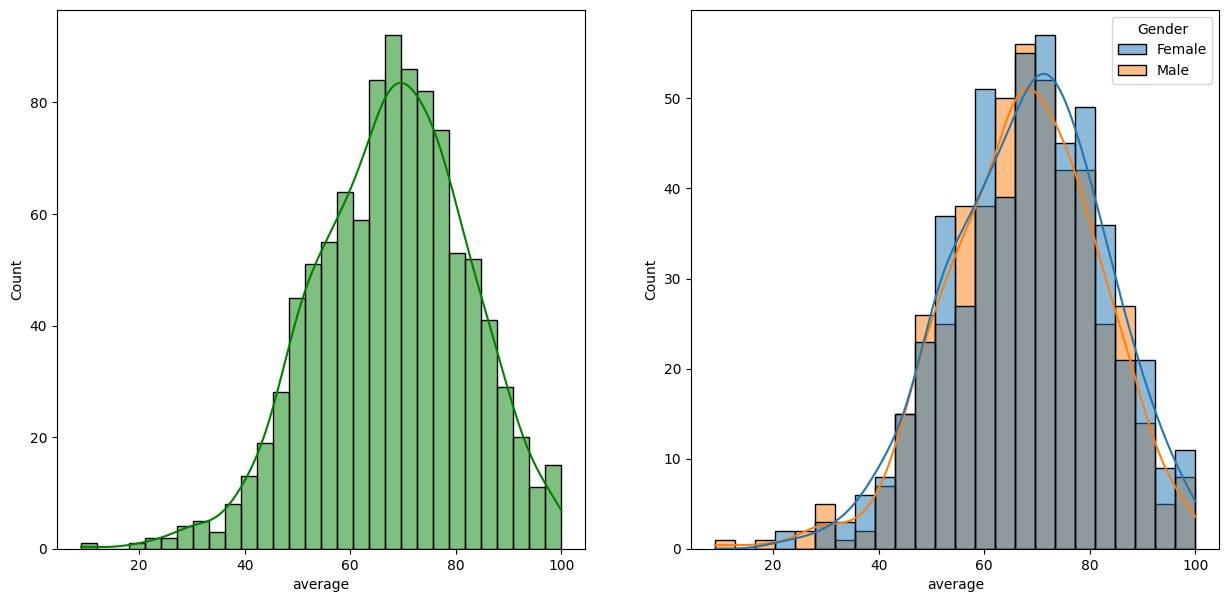

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='Gender')
plt.show()

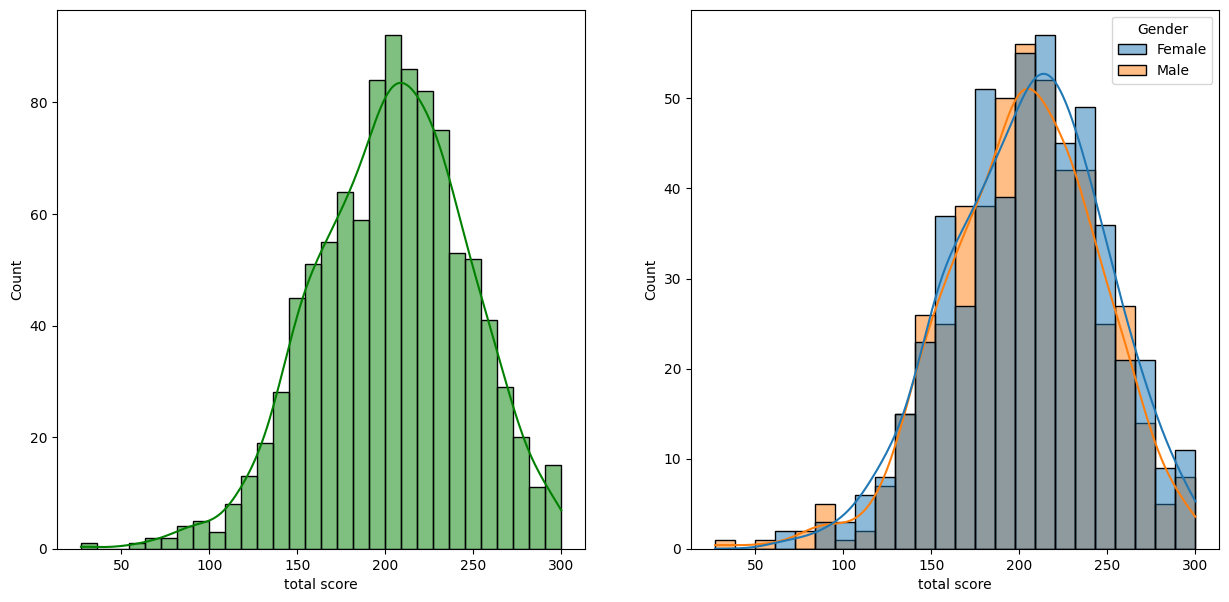

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='Gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

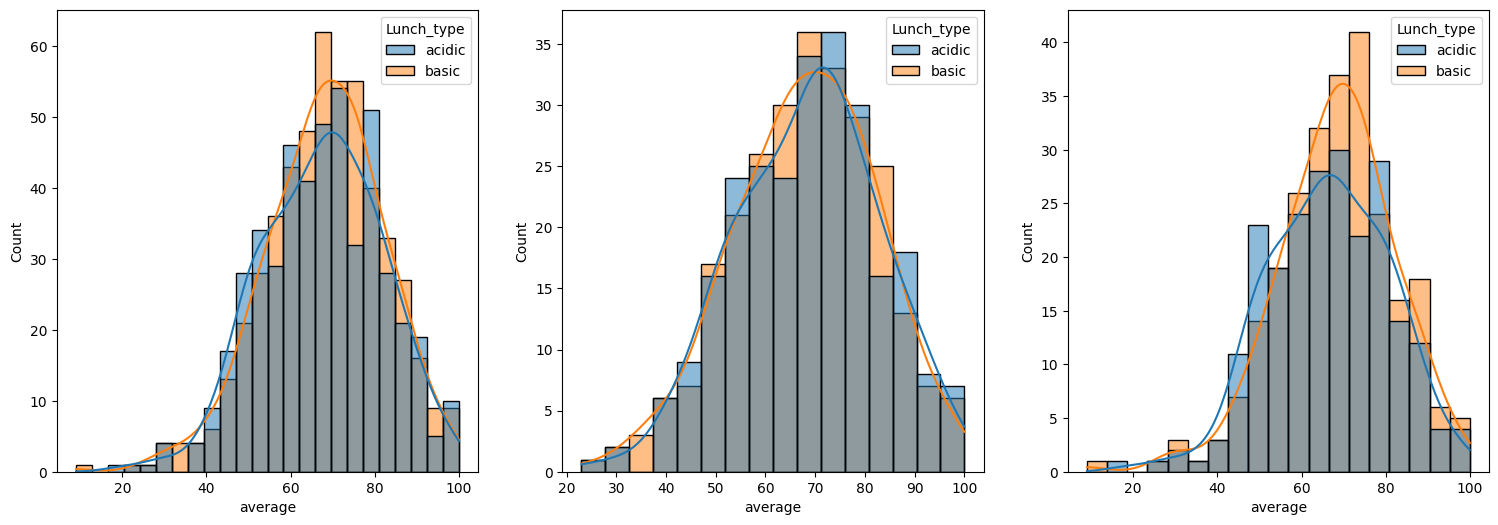

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='Lunch_type')
plt.subplot(142)
sns.histplot(data=df[df.Gender=='Female'],x='average',kde=True,hue='Lunch_type')
plt.subplot(143)
sns.histplot(data=df[df.Gender=='Male'],x='average',kde=True,hue='Lunch_type')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

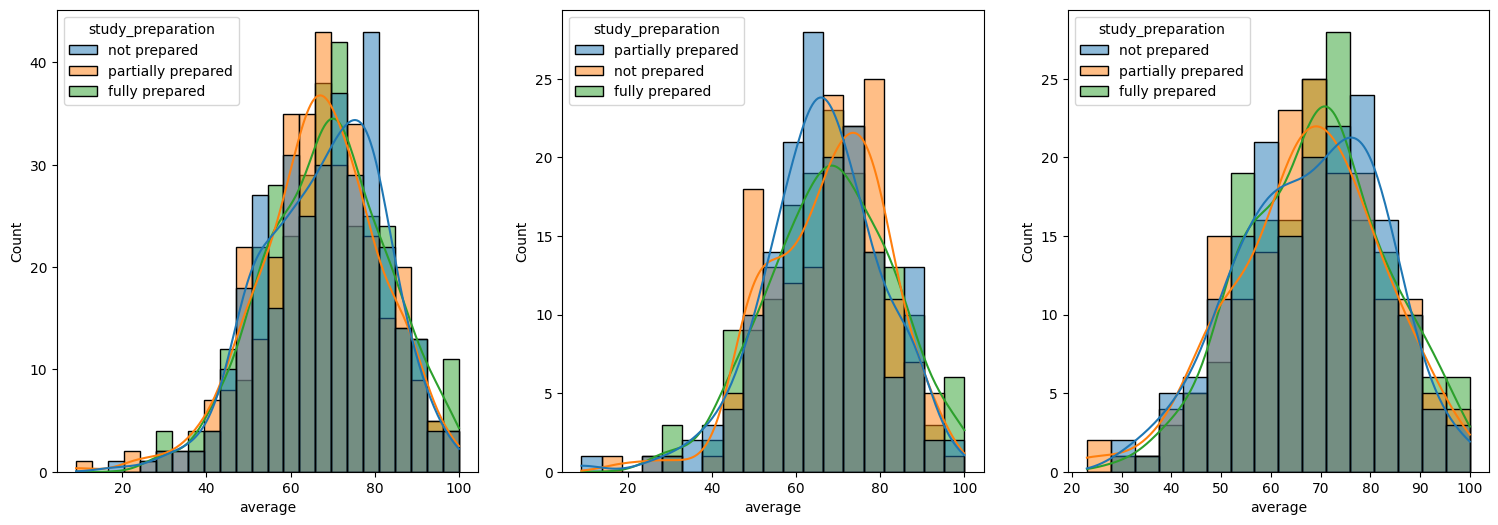

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='study_preparation')
plt.subplot(142)
ax =sns.histplot(data=df[df.Gender=='Male'],x='average',kde=True,hue='study_preparation')
plt.subplot(143)
ax =sns.histplot(data=df[df.Gender=='Female'],x='average',kde=True,hue='study_preparation')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

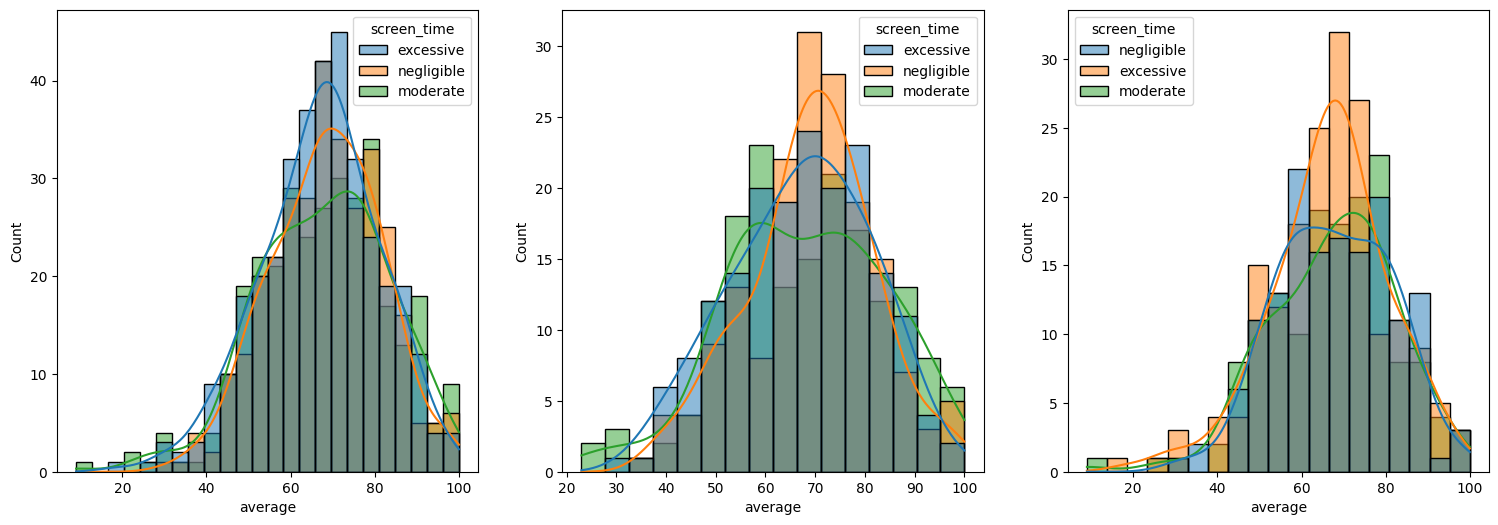

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='screen_time')
plt.subplot(142)
ax =sns.histplot(data=df[df.Gender=='Female'],x='average',kde=True,hue='screen_time')
plt.subplot(143)
ax =sns.histplot(data=df[df.Gender=='Male'],x='average',kde=True,hue='screen_time')
plt.show()

#### 4.2 Maximumum score of students in all three subjects

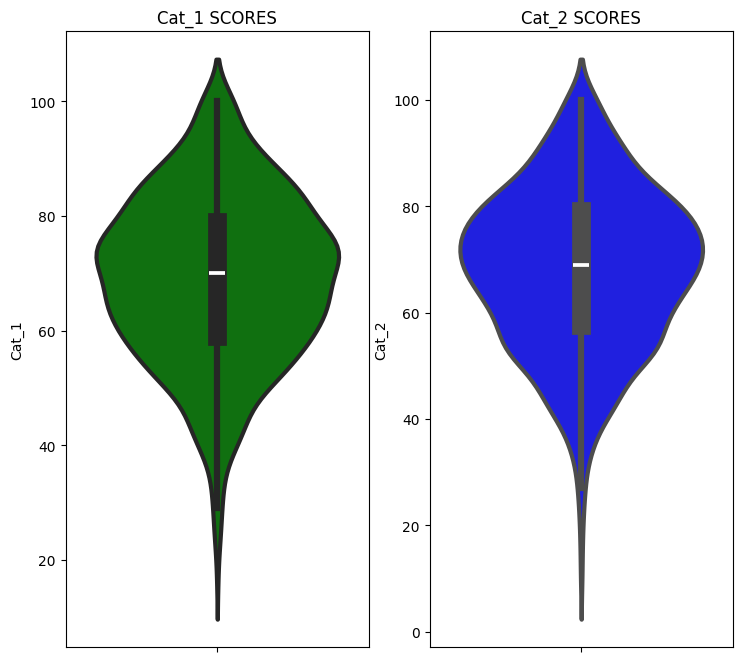

In [25]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 2)
plt.title('Cat_1 SCORES')
sns.violinplot(y='Cat_1',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Cat_2 SCORES')
sns.violinplot(y='Cat_2',data=df,color='blue',linewidth=3)
plt.show()

#### 4.3 Multivariate analysis using pieplot

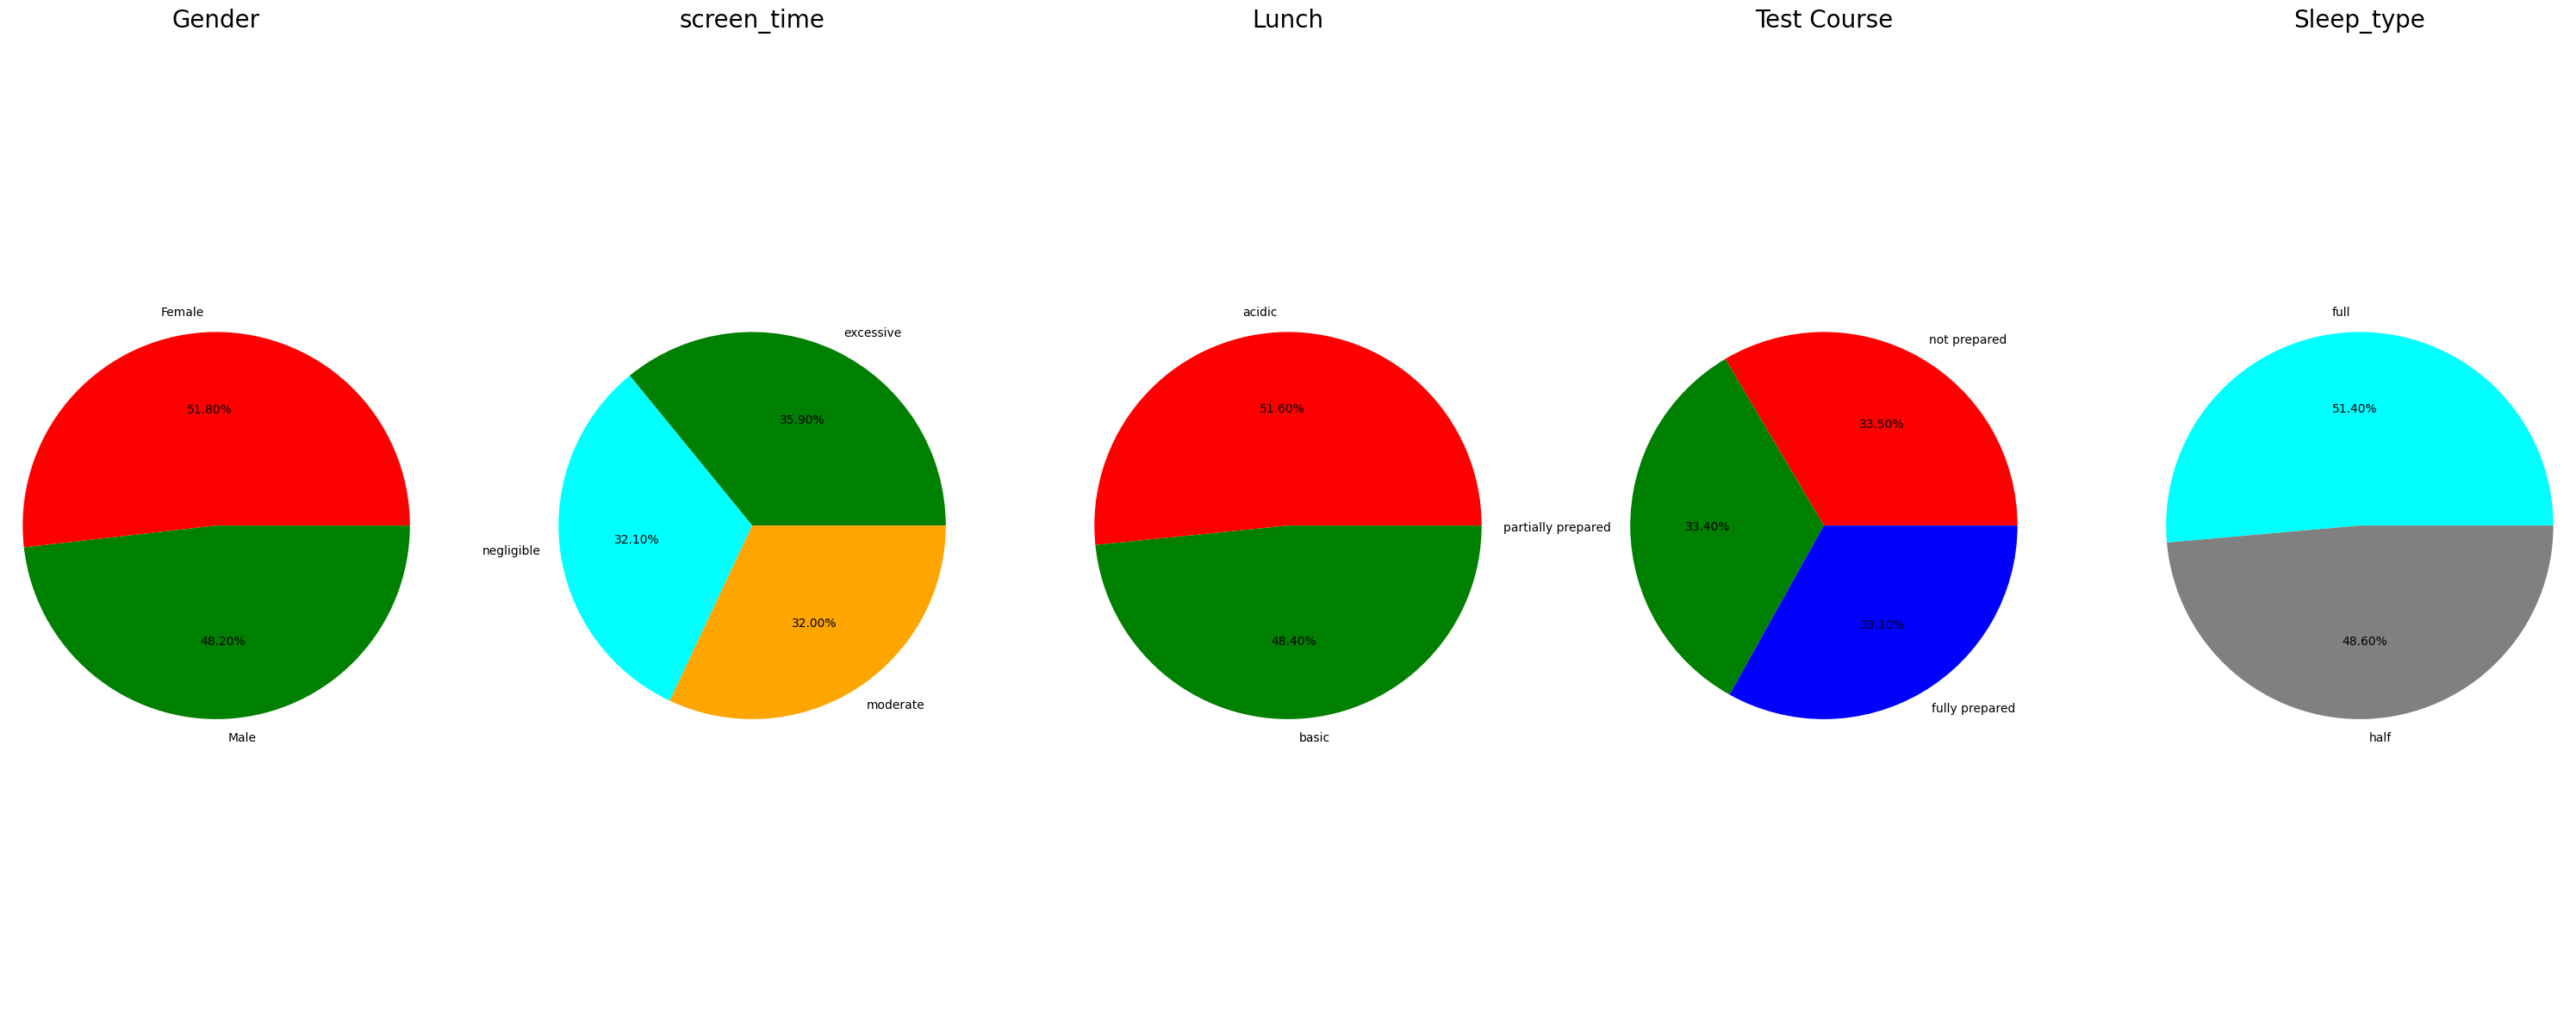

In [31]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['Gender'].value_counts()
labels = 'Female', 'Male'
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('equal')

plt.subplot(1, 5, 2)
size = df['screen_time'].value_counts()
labels = 'excessive', 'negligible', 'moderate'
colors = ['green', 'cyan', 'orange']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('screen_time', fontsize=20)
plt.axis('equal')

plt.subplot(1, 5, 3)
size = df['Lunch_type'].value_counts()
labels = 'acidic', 'basic'
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('equal')

plt.subplot(1, 5, 4)
size = df['study_preparation'].value_counts()
labels = 'not prepared', 'partially prepared', 'fully prepared'
colors = ['red', 'green', 'blue']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('equal')

plt.subplot(1, 5, 5)
size = df['Sleep_type'].value_counts()
labels = "full", "half"
colors = ['cyan', 'grey']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Sleep_type', fontsize=20)
plt.axis('equal')

plt.tight_layout()
plt.show()
